# Sep 27th, 2021

**Motivation**: This has the most succesfull registration of Nissl to sub-SLC01_ses-2 <br>

In [1]:
# HIDE CODE


import os
import sys
import nibabel as nib
import networkx as nx
from time import time
from pprint import pprint
from copy import deepcopy as dc
from os.path import join as pjoin
from myterial import orange, blue_grey
from IPython.display import display, IFrame, HTML
from matplotlib.colors import rgb2hex, to_rgb
import matplotlib.pyplot as plt
import seaborn as sns

# set style & no interpolalation
import matplotlib
matplotlib.rcParams['image.interpolation'] = 'none'
sns.set_style('whitegrid')

# tmp & extras dir
git_dir = pjoin(os.environ['HOME'], 'Dropbox/git')
tmp_dir = pjoin(git_dir, 'jb-Ca-fMRI/tmp')
extras_dir = pjoin(git_dir, 'jb-Ca-fMRI/_extras')
lfr_dir = pjoin(os.environ['HOME'], 'Documents/workspaces/lfr/binary_overlapping')


# GitHub
sys.path.insert(0, pjoin(git_dir, '_Ca-fMRI'))
from register.atlas import load_allen, make_tree_graph
from register.parcellation import Parcellation
from analysis.hierarchical import Hierarchical
from analysis.bootstrap import *
from analysis.svinet import *
from analysis.group import *
from analysis.lfr import *
from utils.render import *
from utils.plotting import *
from model.mouse import Mice
from model.configuration import Config

# warnings
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [2]:
mice = Mice(Config(32), load_preproc=True)

In [3]:
from register.register import *
reg = Register(mice, resolution=100)

In [ ]:
for key, anat in tqdm(mice.T1w.items()):
    indiv = anat.get_data()
    indiv = reg._prepare(indiv)
    m_indiv = mice.mask3d[key].get_data()
    m_indiv = reg._prepare(m_indiv.astype('uint32'))
    ants.image_write(indiv, f"./sep27_imgs/{key}.nii.gz")
    ants.image_write(m_indiv, f"./sep27_imgs/{key}_mask.nii.gz")

    df_tx, best_tx, perf = reg.fit_register(
        mode='3d',
        name=key,
        fixed=reg.nissl,
        moving=indiv,
        save_results=False,
        types=['SyN', 'ElasticSyN'],#, 'SyNAggro'],
        grads=[0.2, 0.3],# [0.15, 0.2, 0.25, 0.3],
        syn_bins=[16, 32],
        aff_bins=[13, 20, 32],
        aff_rates=[0.2, 0.8],
        n_seeds=10,
        mi_q=0.75,
    )
    df_tx.drop('tx', axis=1).to_pickle(f"./sep27_dfs/{key}.df")
    iso_yale = ants.apply_transforms(
        fixed=indiv,
        moving=reg.objects['ISO'],
        transformlist=best_tx['invtransforms'],
        interpolator='genericLabel',
    )
    vis_yale = ants.apply_transforms(
        fixed=indiv,
        moving=reg.objects['VIS'],
        transformlist=best_tx['invtransforms'],
        interpolator='genericLabel',
    )
    ants.image_write(iso_yale, f"./sep27_results/iso_direct_{key}_Best.nii.gz")
    ants.image_write(vis_yale, f"./sep27_results/vis_direct_{key}_Best.nii.gz")
    
    for axis in range(3):
        indiv.plot(
            overlay=iso_yale,
            overlay_cmap='Reds',
            overlay_alpha=0.5,
            axis=axis,
            nslices=49,
            filename=f"./sep27_reg_plts/{key}_Best_axis{axis}.png",
        )

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/10 [00:00<?, ?it/s]

sub-SLC01_ses-1, perf:
seed                 0
type        ElasticSyN
grad               0.3
syn_bin             32
aff_bin             13
aff_rate           0.2
metric             sym
score         0.983218

In [ ]:
key = 'sub-SLC01_ses-2'
indiv = mice.T1w[key].get_data()
indiv = reg._prepare(indiv)
m_indiv = mice.mask3d[key].get_data()
m_indiv = reg._prepare(m_indiv.astype('uint32'))
print(key)

In [5]:
df_tx, best_tx, perf = reg.fit_register(
    mode='3d',
    name='indiv2nissl',
    fixed=reg.nissl,
    moving=indiv,
    save_results=False,
    types=['SyN', 'ElasticSyN'],
    grads=[0.2, 0.3],
    syn_bins=[16, 32],
    aff_bins=[13, 32],
    aff_rates=[0.2],
    n_seeds=5,
)

  0%|          | 0/5 [00:00<?, ?it/s]

indiv2nissl, perf:
seed               4
type             SyN
grad             0.2
syn_bin           16
aff_bin           32
aff_rate         0.2
metric           sym
score       0.980779

In [6]:
_df = df_tx.loc[
    (df_tx['seed'] == 4) &
    (df_tx['type'] == 'SyN') &
    (df_tx['grad'] == 0.2) &
    (df_tx['syn_bin'] == 16) &
    (df_tx['aff_bin'] == 13) &
    (df_tx['aff_rate'] == 0.2)
]
_df

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
896,4,SyN,0.2,16,13,0.2,mi,0.492028,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
897,4,SyN,0.2,16,13,0.2,sym_iso,0.989187,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
898,4,SyN,0.2,16,13,0.2,sym_vis,0.933439,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
899,4,SyN,0.2,16,13,0.2,ovp_iso,0.964235,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
900,4,SyN,0.2,16,13,0.2,ovp_vis,0.959105,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
901,4,SyN,0.2,16,13,0.2,sym,0.975250,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
902,4,SyN,0.2,16,13,0.2,ovp,0.962953,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
903,4,SyN,0.2,16,13,0.2,mi_fixed,0.324601,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
904,4,SyN,0.2,16,13,0.2,sym_iso_fixed,0.969184,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
905,4,SyN,0.2,16,13,0.2,sym_vis_fixed,0.968280,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


<AxesSubplot:xlabel='score', ylabel='Count'>

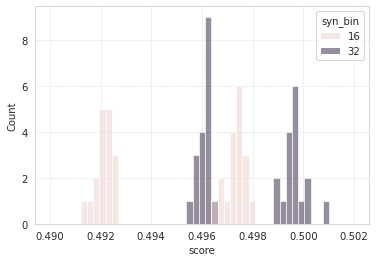

In [9]:
sns.histplot(
    data=df_tx.loc[df_tx['metric'] == 'mi'],
    x='score',
    hue='syn_bin',
    bins=np.linspace(0.49, 0.502, 50),
)

<AxesSubplot:xlabel='score', ylabel='Count'>

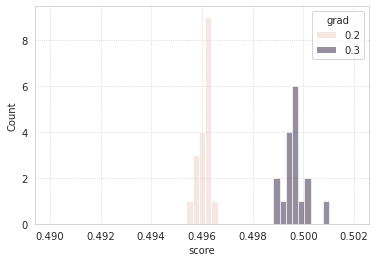

In [10]:
sns.histplot(
    data=df_tx.loc[(df_tx['metric'] == 'mi') & (df_tx['syn_bin'] == 32)],
    x='score',
    hue='grad',
    bins=np.linspace(0.49, 0.502, 50),
)

In [11]:
df = df_tx.loc[
    (df_tx['grad'] == 0.3) &
    (df_tx['syn_bin'] == 32) &
    (df_tx['metric'] == 'mi')
]
df

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
84,0,SyN,0.3,32,13,0.2,mi,0.499653,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
98,0,SyN,0.3,32,32,0.2,mi,0.172756,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
196,0,ElasticSyN,0.3,32,13,0.2,mi,0.499606,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
210,0,ElasticSyN,0.3,32,32,0.2,mi,0.499648,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
308,1,SyN,0.3,32,13,0.2,mi,0.499061,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
322,1,SyN,0.3,32,32,0.2,mi,0.500080,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
420,1,ElasticSyN,0.3,32,13,0.2,mi,0.499037,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
434,1,ElasticSyN,0.3,32,32,0.2,mi,0.499198,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
532,2,SyN,0.3,32,13,0.2,mi,0.499508,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
546,2,SyN,0.3,32,32,0.2,mi,0.071741,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [12]:
df['score'].argsort().values

array([ 9, 11,  1,  6,  4,  7, 12, 13, 16,  8,  2, 14,  3,  0, 17, 10, 18,
        5, 15, 19])

In [13]:
df.iloc[[19]]

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
1106,4,ElasticSyN,0.3,32,32,0.2,mi,0.500908,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [14]:
_df = df_tx.loc[
    (df_tx['seed'] == 4) &
    (df_tx['type'] == 'ElasticSyN') &
    (df_tx['grad'] == 0.3) &
    (df_tx['syn_bin'] == 32) &
    (df_tx['aff_bin'] == 32) &
    (df_tx['aff_rate'] == 0.2)
]
_df

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
1106,4,ElasticSyN,0.3,32,32,0.2,mi,0.500908,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
1107,4,ElasticSyN,0.3,32,32,0.2,sym_iso,0.997923,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
1108,4,ElasticSyN,0.3,32,32,0.2,sym_vis,0.910112,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
1109,4,ElasticSyN,0.3,32,32,0.2,ovp_iso,0.967698,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
1110,4,ElasticSyN,0.3,32,32,0.2,ovp_vis,0.969865,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
1111,4,ElasticSyN,0.3,32,32,0.2,sym,0.975971,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
1112,4,ElasticSyN,0.3,32,32,0.2,ovp,0.968240,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
1113,4,ElasticSyN,0.3,32,32,0.2,mi_fixed,0.325335,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
1114,4,ElasticSyN,0.3,32,32,0.2,sym_iso_fixed,0.981789,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
1115,4,ElasticSyN,0.3,32,32,0.2,sym_vis_fixed,0.920661,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [15]:
alt = df.iloc[df['score'].argmax()]
print(alt)

seed                                                        4
type                                               ElasticSyN
grad                                                      0.3
syn_bin                                                    32
aff_bin                                                    32
aff_rate                                                  0.2
metric                                                     mi
score                                                0.500908
tx          {'warpedmovout': ANTsImage (RAI)
         Pixel Type ...
Name: 1106, dtype: object

(0.9, 1.0)

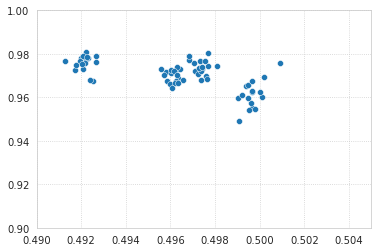

In [16]:
sns.scatterplot(
    x=df_tx.loc[df_tx.metric == 'mi', 'score'].values,
    y=df_tx.loc[df_tx.metric == 'sym', 'score'].values,
)
plt.xlim(0.49, 0.505)
plt.ylim(0.90, 1.0)

(0.95, 1.0)

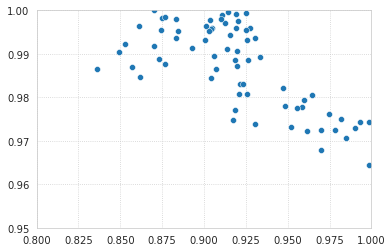

In [17]:
sns.scatterplot(
    x=df_tx.loc[df_tx.metric == 'sym_vis', 'score'].values,
    y=df_tx.loc[df_tx.metric == 'sym_iso', 'score'].values,
)
plt.xlim(0.8, 1.0)
plt.ylim(0.95, 1.0)

In [18]:
a = df_tx.loc[df_tx.metric == 'sym_iso', 'score'].values
b = df_tx.loc[df_tx.metric == 'sym_vis', 'score'].values
c = (2 * a + b) / 3
c[np.isnan(c)] = -1

In [19]:
np.argmax(c)

12

In [96]:
df_tx.loc[df_tx.metric == 'sym_iso'].iloc[[102]]

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
817,4,SyN,0.3,16,13,0.2,sym_iso,0.974359,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [90]:
_df = df_tx.loc[
    (df_tx['seed'] == 1) &
    (df_tx['type'] == 'SyN') &
    (df_tx['grad'] == 0.3) &
    (df_tx['syn_bin'] == 16) &
    (df_tx['aff_bin'] == 13) &
    (df_tx['aff_rate'] == 0.2)
]
_df

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
240,1,SyN,0.3,16,13,0.2,mi,0.497111,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
241,1,SyN,0.3,16,13,0.2,sym_iso,0.975625,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
242,1,SyN,0.3,16,13,0.2,sym_vis,0.946844,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
243,1,SyN,0.3,16,13,0.2,sym,0.961234,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
244,1,SyN,0.3,16,13,0.2,mi_fixed,0.325399,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
245,1,SyN,0.3,16,13,0.2,sym_iso_fixed,0.958575,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
246,1,SyN,0.3,16,13,0.2,sym_vis_fixed,0.970639,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
247,1,SyN,0.3,16,13,0.2,sym_fixed,0.964607,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [91]:
alt = df.iloc[df['score'].argmax()]
print(alt)

seed                                                        4
type                                               ElasticSyN
grad                                                      0.3
syn_bin                                                    32
aff_bin                                                    20
aff_rate                                                  0.2
metric                                                    sym
score                                                0.957011
tx          {'warpedmovout': ANTsImage (RAI)
         Pixel Type ...
Name: 947, dtype: object

(0.96, 0.97)

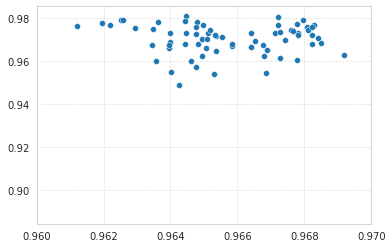

In [33]:
sns.scatterplot(
    x=df_tx.loc[df_tx['metric'] == 'ovp', 'score'].values,
    y=df_tx.loc[df_tx['metric'] == 'sym', 'score'].values,
)
plt.xlim(0.96, 0.97)

(0.9, 0.99)

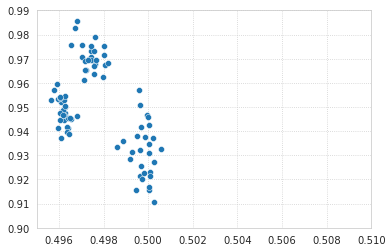

In [28]:
sns.scatterplot(
    data=df_tx.loc[df_tx['metric'] == 'mi'
    x=df_tx.loc[df_tx['metric'] == 'mi', 'score'].values,
    y=df_tx.loc[df_tx['metric'] == 'sym', 'score'].values,
)
plt.xlim(0.495, 0.51)
plt.ylim(0.90, 0.99)

In [21]:
df_tx.loc[df_tx.seed == 1]

,seed,type,grad,syn_bin,aff_bin,aff_rate,metric,score,tx
32,1,SyN,0.2,32,20,0.2,mi,0.496176,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
33,1,SyN,0.2,32,20,0.2,sym_iso,0.990708,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
34,1,SyN,0.2,32,20,0.2,sym_vis,0.906793,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
35,1,SyN,0.2,32,20,0.2,sym,0.948751,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
36,1,SyN,0.2,32,20,0.2,mi_fixed,0.324756,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
37,1,SyN,0.2,32,20,0.2,sym_iso_fixed,0.974037,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
38,1,SyN,0.2,32,20,0.2,sym_vis_fixed,0.940000,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
39,1,SyN,0.2,32,20,0.2,sym_fixed,0.957018,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
40,1,SyN,0.2,32,32,0.2,mi,0.496002,{'warpedmovout': ANTsImage (RAI) Pixel Type ...
41,1,SyN,0.2,32,32,0.2,sym_iso,0.991222,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [34]:
warped = ants.apply_transforms(
    fixed=reg.nissl,
    moving=indiv,
    transformlist=best_tx['fwdtransforms'],
    interpolator='linear',
)

In [35]:
iso_yale = ants.apply_transforms(
    fixed=indiv,
    moving=reg.iso,
    transformlist=best_tx['invtransforms'],
    interpolator='genericLabel',
)
vis_yale = ants.apply_transforms(
    fixed=indiv,
    moving=reg.vis,
    transformlist=best_tx['invtransforms'],
    interpolator='genericLabel',
)
mask_r_yale = ants.apply_transforms(
    fixed=indiv,
    moving=reg.mask_r,
    transformlist=best_tx['invtransforms'],
    interpolator='genericLabel',
)
mask_l_yale = ants.apply_transforms(
    fixed=indiv,
    moving=reg.mask_l,
    transformlist=best_tx['invtransforms'],
    interpolator='genericLabel',
)

In [36]:
mi = ants.image_mutual_information(reg.nissl, warped)
mi_base = ants.image_mutual_information(reg.nissl, reg.nissl)

score_iso = symmetry_score(
    m=iso_yale.numpy().astype(bool),
    mask_l=mask_l_yale.numpy().astype(bool),
    mask_r=mask_r_yale.numpy().astype(bool),
)
score_vis = symmetry_score(
    m=vis_yale.numpy().astype(bool),
    mask_l=mask_l_yale.numpy().astype(bool),
    mask_r=mask_r_yale.numpy().astype(bool),
)
print(f"mi: {mi / mi_base:.4f},\tiso: {score_iso:.4f},\tvis: {score_vis:.4f}")

mi: 0.4922,     iso: 0.9994,    vis: 0.9250

In [37]:
ants.image_write(iso_yale, f"./iso_direct_{key}_Best.nii.gz")
ants.image_write(vis_yale, f"./vis_direct_{key}_Best.nii.gz")

In [38]:
mask = indiv.get_mask()

mi = ants.image_mutual_information(reg.nissl, (warped * reg.nissl.get_mask()))
mi_base = ants.image_mutual_information(reg.nissl, reg.nissl)

score_iso = symmetry_score(
    m=(iso_yale * mask).numpy().astype(bool),
    mask_l=(mask_l_yale * mask).numpy().astype(bool),
    mask_r=(mask_r_yale * mask).numpy().astype(bool),
)
score_vis = symmetry_score(
    m=(vis_yale * mask).numpy().astype(bool),
    mask_l=(mask_l_yale * mask).numpy().astype(bool),
    mask_r=(mask_r_yale * mask).numpy().astype(bool),
)
print(f"mi: {mi / mi_base:.4f},\tiso: {score_iso:.4f},\tvis: {score_vis:.4f}")

mi: 0.3247,     iso: 0.9806,    vis: 0.9525

In [39]:
ants.image_write(iso_yale * mask, f"./iso_direct_{key}_Best-fix.nii.gz")
ants.image_write(vis_yale * mask, f"./vis_direct_{key}_Best-fix.nii.gz")

In [41]:
axis = 0

indiv.plot(
    overlay=iso_yale,
    overlay_cmap='Reds',
    overlay_alpha=0.5,
    axis=axis,
    nslices=49,
    filename=f"{key}_best_axis{axis}.png",
)

In [28]:
mask

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (78, 64, 64)
         Spacing    : (0.1, 0.1, 0.1)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [137]:
overlap_score(iso_yale.numpy().astype(bool), mask.numpy().astype(bool))

0.9680537723736878

In [138]:
overlap_score(vis_yale.numpy().astype(bool), mask.numpy().astype(bool))

0.9714285714285714

In [67]:
np.logical_and(iso_yale.numpy().astype(bool), mask.numpy().astype(bool)).sum()

12818

In [68]:
iso_yale.numpy().astype(bool).sum()

13241

In [69]:
12818 - 13241

-423

In [56]:
13299 - 13744

-445

In [29]:
94945 - 94707

238

In [23]:
(95335 - 95090)

245

In [32]:
tess = ants.image_read('./tess.nii.gz')
tess

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (132, 80, 114)
         Spacing    : (0.1, 0.1, 0.1)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [33]:
tess_yale = ants.apply_transforms(
    fixed=indiv,
    moving=tess,
    transformlist=best_tx['invtransforms'],
    interpolator='genericLabel',
)

In [34]:
tess_yale

ANTsImage (RAI)
         Pixel Type : float (float32)
         Components : 1
         Dimensions : (78, 64, 64)
         Spacing    : (0.1, 0.1, 0.1)
         Origin     : (0.0, 0.0, 0.0)
         Direction  : [1. 0. 0. 0. 1. 0. 0. 0. 1.]

In [35]:
ants.image_write(tess_yale, f'./tess_{key}_Best.nii.gz')

In [34]:
overlap_score(tess_yale.numpy().astype(bool), reg.in_house.numpy().astype(bool))

0.9999967734962072

In [38]:
dice_score(tess_yale.numpy().astype(bool), reg.in_house.numpy().astype(bool))

0.6454462626189001

In [39]:
tess_yale.numpy().astype(bool).sum()

309933

In [40]:
np.logical_and(tess_yale.numpy().astype(bool), reg.in_house.numpy().astype(bool)).sum()

309932

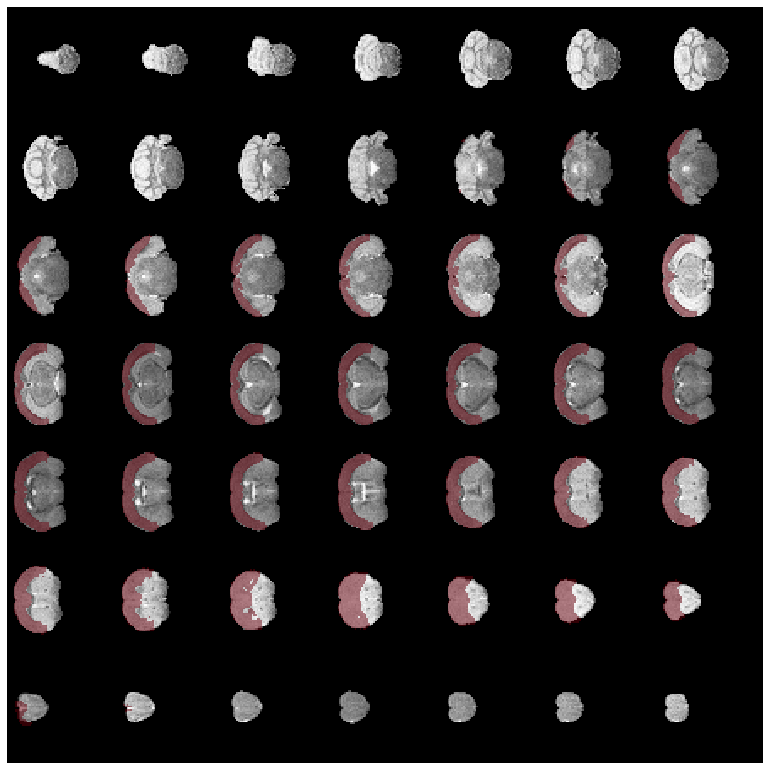

In [71]:
indiv.plot(
    overlay=iso_yale,
    overlay_cmap='Reds',
    overlay_alpha=0.5,
    axis=0,
    nslices=49,
)

In [25]:
warped = ants.apply_transforms(
    fixed=reg.nissl,
    moving=indiv,
    transformlist=alt['tx']['fwdtransforms'],
    interpolator='linear',
)

In [26]:
iso_yale = ants.apply_transforms(
    fixed=indiv,
    moving=reg.iso,
    transformlist=alt['tx']['invtransforms'],
    interpolator='genericLabel',
)
vis_yale = ants.apply_transforms(
    fixed=indiv,
    moving=reg.vis,
    transformlist=alt['tx']['invtransforms'],
    interpolator='genericLabel',
)
mask_r_yale = ants.apply_transforms(
    fixed=indiv,
    moving=reg.mask_r,
    transformlist=alt['tx']['invtransforms'],
    interpolator='genericLabel',
)
mask_l_yale = ants.apply_transforms(
    fixed=indiv,
    moving=reg.mask_l,
    transformlist=alt['tx']['invtransforms'],
    interpolator='genericLabel',
)

In [27]:
mi = ants.image_mutual_information(reg.nissl, warped)
mi_base = ants.image_mutual_information(reg.nissl, reg.nissl)

score_iso = symmetry_score(
    m=iso_yale.numpy().astype(bool),
    mask_l=mask_l_yale.numpy().astype(bool),
    mask_r=mask_r_yale.numpy().astype(bool),
)
score_vis = symmetry_score(
    m=vis_yale.numpy().astype(bool),
    mask_l=mask_l_yale.numpy().astype(bool),
    mask_r=mask_r_yale.numpy().astype(bool),
)
print(f"mi: {mi / mi_base:.4f},\tiso: {score_iso:.4f},\tvis: {score_vis:.4f}")

mi: 0.5009,     iso: 0.9979,    vis: 0.9101

In [28]:
ants.image_write(iso_yale, f"./iso_direct_{key}_Best(alt).nii.gz")
ants.image_write(vis_yale, f"./vis_direct_{key}_Best(alt).nii.gz")

In [ ]:
df_tx, best_tx, perf = reg.fit_register(
    mode='3d',
    name='nissl2yale',
    fixed=reg.in_house,
    moving=reg.nissl,
    save_results=False,
    types=['SyN', 'ElasticSyN', 'SyNAggro'],
    grads=[0.2, 0.3],
    syn_bins=[8, 16, 32],
    aff_bins=[8, 16, 32],
    aff_rates=[0.2, 0.5, 0.8],
    n_seeds=5,
)

  0%|          | 0/5 [00:00<?, ?it/s]

In [4]:
iso = reset_ants_img(mice.allen['isocortex_mask'])

vis = mice.allen['structure_tree'].get_structures_by_acronym(['VIS'])[0]
vis = mice.allen['mcc'].get_structure_mask(vis['id'])[0]
vis = reset_ants_img(vis)

mask_r = reset_ants_img(mice.parcel.results['mask_r'], dtype='uint32')
mask_l = reset_ants_img(mice.parcel.results['mask_l'], dtype='uint32')

In [5]:
tx = ants.registration(
    fixed=reg.in_house,
    moving=reg.nissl,
    mask=reg.nissl.get_mask(),
    type_of_transform='SyN',
    syn_metric='mattes',
    grad_step=0.15,
    syn_sampling=20,
    aff_sampling=20,
    random_seed=4,
)

In [6]:
iso_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=iso,
    transformlist=tx['fwdtransforms'],
    interpolator='genericLabel',
)
vis_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=vis,
    transformlist=tx['fwdtransforms'],
    interpolator='genericLabel',
)
mask_r_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=mask_r,
    transformlist=tx['fwdtransforms'],
    interpolator='genericLabel',
)
mask_l_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=mask_l,
    transformlist=tx['fwdtransforms'],
    interpolator='genericLabel',
)

In [7]:
warped = ants.apply_transforms(
    fixed=reg.in_house,
    moving=reg.nissl,
    transformlist=tx['fwdtransforms'],
    interpolator='linear',
)
mi = ants.image_mutual_information(
    reg.in_house, warped)
mi_base = ants.image_mutual_information(
    reg.in_house, reg.in_house)

score_iso = symmetry_score(
    m=iso_yale.numpy().astype(bool),
    mask_l=mask_l_yale.numpy().astype(bool),
    mask_r=mask_r_yale.numpy().astype(bool),
)
score_vis = symmetry_score(
    m=vis_yale.numpy().astype(bool),
    mask_l=mask_l_yale.numpy().astype(bool),
    mask_r=mask_r_yale.numpy().astype(bool),
)
print(f"mi: {mi / mi_base:.4f},\tiso: {score_iso:.4f},\tvis: {score_vis:.4f}")

mi: 0.4985,     iso: 0.9979,    vis: 0.9409

In [8]:
ants.image_write(iso_yale, "./iso_yale_SyN_0.1_Best.nii.gz")
ants.image_write(vis_yale, "./vis_yale_SyN_0.1_Best.nii.gz")

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]]], dtype=uint8)

In [9]:
dst = 'best_nissl2yale_0.1mm'
for src in tx['fwdtransforms']:
    ext = '.'.join(src.split('.')[1:])
    _dst = pjoin(
        './', f"{dst}-fwd.{ext}")
    shutil.copyfile(src=src, dst=_dst)
for src in tx['invtransforms']:
    ext = '.'.join(src.split('.')[1:])
    _dst = pjoin(
        './', f"{dst}-inv.{ext}")
    shutil.copyfile(src=src, dst=_dst)

## Now do Yale2Indiv

In [10]:
key = 'sub-SLC01_ses-2'
indiv = mice.T1w[key].get_data()
indiv = reg._prepare(indiv)
print(key)

sub-SLC01_ses-2

In [11]:
tx_indiv = ants.registration(
    fixed=reg.in_house,
    moving=indiv,
    mask=indiv.get_mask(),
    type_of_transform='SyN',
    syn_metric='mattes',
    grad_step=.2,
    syn_sampling=32,
    aff_sampling=10,
    random_seed=4,
)

In [12]:
warped = ants.apply_transforms(
    fixed=reg.in_house,
    moving=indiv,
    transformlist=tx_indiv['fwdtransforms'],
    interpolator='linear',
)
iso_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=iso_yale,
    transformlist=tx_indiv['invtransforms'],
    interpolator='genericLabel',
)
vis_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=vis_yale,
    transformlist=tx_indiv['invtransforms'],
    interpolator='genericLabel',
)
mask_r_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=mask_r_yale,
    transformlist=tx_indiv['invtransforms'],
    interpolator='genericLabel',
)
mask_l_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=mask_l_yale,
    transformlist=tx_indiv['invtransforms'],
    interpolator='genericLabel',
)

In [13]:
mi = ants.image_mutual_information(
    reg.in_house, warped)
mi_base = ants.image_mutual_information(
    reg.in_house, reg.in_house)

score_iso = symmetry_score(
    m=iso_indiv.numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
score_vis = symmetry_score(
    m=vis_indiv.numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
print(f"mi: {mi / mi_base:.4f},\tiso: {score_iso:.4f},\tvis: {score_vis:.4f}")

mi: 0.6499,     iso: 0.9850,    vis: 0.9536

In [14]:
for axis in range(3):
    indiv.plot(
        overlay=iso_indiv,
        axis=axis,
        overlay_alpha=0.5,
        overlay_cmap='Reds',
        nslices=49,
        figsize=1,
        filename=f'double_{key}_SyN_axis{axis}.png',
    )

In [15]:
ants.image_write(indiv, f"{key}.nii.gz")
ants.image_write(iso_indiv, f"{key}_iso.nii.gz")
ants.image_write(vis_indiv, f"{key}_vis.nii.gz")

## Now do the inverse of double thing

In [16]:
tx_indiv = ants.registration(
    fixed=indiv,
    moving=reg.in_house,
    mask=reg.in_house.get_mask(),
    type_of_transform='SyN',
    syn_metric='mattes',
    grad_step=.2,
    syn_sampling=32,
    aff_sampling=12,
    random_seed=4,
)

In [17]:
warped = ants.apply_transforms(
    fixed=indiv,
    moving=reg.in_house,
    transformlist=tx_indiv['fwdtransforms'],
    interpolator='linear',
)
iso_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=iso_yale,
    transformlist=tx_indiv['fwdtransforms'],
    interpolator='genericLabel',
)
vis_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=vis_yale,
    transformlist=tx_indiv['fwdtransforms'],
    interpolator='genericLabel',
)
mask_r_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=mask_r_yale,
    transformlist=tx_indiv['fwdtransforms'],
    interpolator='genericLabel',
)
mask_l_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=mask_l_yale,
    transformlist=tx_indiv['fwdtransforms'],
    interpolator='genericLabel',
)

In [18]:
mi = ants.image_mutual_information(indiv, warped)
mi_base = ants.image_mutual_information(indiv, indiv)

score_iso = symmetry_score(
    m=iso_indiv.numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
score_vis = symmetry_score(
    m=vis_indiv.numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
print(f"mi: {mi / mi_base:.4f},\tiso: {score_iso:.4f},\tvis: {score_vis:.4f}")

mi: 0.7343,     iso: 0.9571,    vis: 0.9986

In [19]:
ants.image_write(iso_indiv, f"{key}_iso2.nii.gz")
ants.image_write(vis_indiv, f"{key}_vis2.nii.gz")

In [20]:
for axis in range(3):
    indiv.plot(
        overlay=iso_indiv,
        axis=axis,
        overlay_alpha=0.5,
        overlay_cmap='Reds',
        nslices=49,
        figsize=1,
        filename=f'double2_{key}_ElasticSyN_axis{axis}.png',
    )

## Direct indiv

In [107]:
tx_indiv = ants.registration(
    fixed=indiv,
    moving=reg.nissl,
    mask=reg.nissl.get_mask(),
    type_of_transform='SyN',
    syn_metric='mattes',
    grad_step=.2,
    aff_random_sampling_rate=.8,
    syn_sampling=32,
    aff_sampling=20,
    random_seed=4,
)

In [108]:
warped = ants.apply_transforms(
    fixed=indiv,
    moving=reg.nissl,
    transformlist=tx_indiv['fwdtransforms'],
    interpolator='linear',
)
iso_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=iso,
    transformlist=tx_indiv['fwdtransforms'],
    interpolator='genericLabel',
)
vis_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=vis,
    transformlist=tx_indiv['fwdtransforms'],
    interpolator='genericLabel',
)
mask_r_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=mask_r,
    transformlist=tx_indiv['fwdtransforms'],
    interpolator='genericLabel',
)
mask_l_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=mask_l,
    transformlist=tx_indiv['fwdtransforms'],
    interpolator='genericLabel',
)

In [109]:
mi = ants.image_mutual_information(indiv, warped)
mi_base = ants.image_mutual_information(indiv, indiv)

score_iso = symmetry_score(
    m=iso_indiv.numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
score_vis = symmetry_score(
    m=vis_indiv.numpy().astype(bool),
    mask_l=mask_l_indiv.numpy().astype(bool),
    mask_r=mask_r_indiv.numpy().astype(bool),
)
print(f"mi: {mi / mi_base:.4f},\tiso: {score_iso:.4f},\tvis: {score_vis:.4f}")

mi: 0.5635,     iso: 0.9854,    vis: 0.9430

In [86]:
ants.image_write(iso_indiv, f"{key}_iso3.nii.gz")
ants.image_write(vis_indiv, f"{key}_vis3.nii.gz")

In [ ]:
ants.registration()

In [61]:
ants.image_write(reg.nissl, "nissl.nii.gz")

### Now do the direct to indiv thing

In [96]:
tx_indiv = ants.registration(
    fixed=indiv,
    moving=reg.nissl,
    mask=reg.nissl.get_mask(),
    type_of_transform='ElasticSyN',
    syn_metric='mattes',
    grad_step=.2,
    syn_sampling=32,
    aff_sampling=10,
    random_seed=4,
)

In [6]:
# reg.save_atlas_images()

In [7]:
df_tx, best_tx, perf = reg.fit_register(
    name='a',
    mode='3d',
    fixed=reg.in_house,
    moving=reg.nissl,
    save_results=False,
    grads=[np.round(e, 2) for e in np.linspace(0.01, 0.7, 30)],
    types=['SyN', 'ElasticSyN'],
    bins=[12, 16, 20, 24],
    n_seeds=5,
)

  0%|          | 0/5 [00:00<?, ?it/s]

a, perf:
seed           4
grad        0.27
bins          16
type         SyN
perf    0.493284

In [8]:
_df = df_tx.groupby(['type', 'bins', 'grad']).mean().drop(columns=['seed']).unstack()
_df

perf 
 
 
 
 grad 
 0.01 
 0.03 
 0.06 
 0.08 
 0.11 
 0.13 
 0.15 
 0.18 
 0.20 
 0.22 
 ... 
 0.49 
 0.51 
 0.53 
 0.56 
 0.58 
 0.60 
 0.63 
 0.65 
 0.68 
 0.70 
 
 
 type 
 bins 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 ElasticSyN 
 12 
 0.469632 
 0.479674 
 0.485620 
 0.488338 
 0.488804 
 0.488379 
 0.489690 
 0.490180 
 0.491889 
 0.491135 
 ... 
 0.487499 
 0.485682 
 0.487556 
 0.484668 
 0.484756 
 0.484975 
 0.484932 
 0.482894 
 0.482235 
 0.482904 
 
 
 16 
 0.467723 
 0.477344 
 0.484073 
 0.485691 
 0.486216 
 0.490447 
 0.487172 
 0.486056 
 0.484397 
 0.488262 
 ... 
 0.485971 
 0.486505 
 0.484690 
 0.485514 
 0.480731 
 0.483088 
 0.481851 
 0.483741 
 0.481056 
 0.482164 
 
 
 20 
 0.468050 
 0.477604 
 0.484495 
 0.487739 
 0.488618 
 0.488169 
 0.489713 
 0.490070 
 0.489405 
 0.490264 
 ... 
 0.486607 
 0.485014 
 0.485454 
 0.483962 
 0.482130 
 0.482688 
 0.483474 
 0.480626 
 0.480014 
 0.483010 
 
 
 24 
 0.465644 
 0.472964 
 0.478402 
 0.486558 
 0.482948 
 0.482540 
 0.487808 
 0.485567 
 0.490883 
 0.481658 
 ... 
 0.486306 
 0.482292 
 0.485459 
 0.482042 
 0.482615 
 0.484149 
 0.482069 
 0.483186 
 0.481789 
 0.480048 
 
 
 SyN 
 12 
 0.469857 
 0.478955 
 0.485271 
 0.487289 
 0.488214 
 0.490021 
 0.490052 
 0.491244 
 0.491258 
 0.490909 
 ... 
 0.487403 
 0.487010 
 0.486230 
 0.485269 
 0.483438 
 0.484829 
 0.483385 
 0.482416 
 0.483498 
 0.480959 
 
 
 16 
 0.468915 
 0.480556 
 0.482550 
 0.485246 
 0.489913 
 0.490772 
 0.485094 
 0.489489 
 0.490441 
 0.484398 
 ... 
 0.486264 
 0.485692 
 0.487301 
 0.486133 
 0.484540 
 0.485009 
 0.485849 
 0.483785 
 0.476636 
 0.482646 
 
 
 20 
 0.469430 
 0.478886 
 0.485205 
 0.485136 
 0.487357 
 0.489462 
 0.489211 
 0.489328 
 0.490451 
 0.490107 
 ... 
 0.485073 
 0.485747 
 0.485390 
 0.483423 
 0.484655 
 0.485840 
 0.481630 
 0.485136 
 0.481793 
 0.481030 
 
 
 24 
 0.464073 
 0.476030 
 0.479047 
 0.482457 
 0.488297 
 0.481748 
 0.481842 
 0.483200 
 0.488172 
 0.489385 
 ... 
 0.488554 
 0.485177 
 0.486054 
 0.483489 
 0.484542 
 0.484340 
 0.482289 
 0.479200 
 0.482271 
 0.481183 
 
 
 
 8 rows × 30 columns

In [9]:
_df.stack().reset_index()

,type,bins,grad,perf
0,ElasticSyN,12,0.01,0.469632
1,ElasticSyN,12,0.03,0.479674
2,ElasticSyN,12,0.06,0.485620
3,ElasticSyN,12,0.08,0.488338
4,ElasticSyN,12,0.11,0.488804
...,...,...,...,...
235,SyN,24,0.60,0.484340
236,SyN,24,0.63,0.482289
237,SyN,24,0.65,0.479200
238,SyN,24,0.68,0.482271


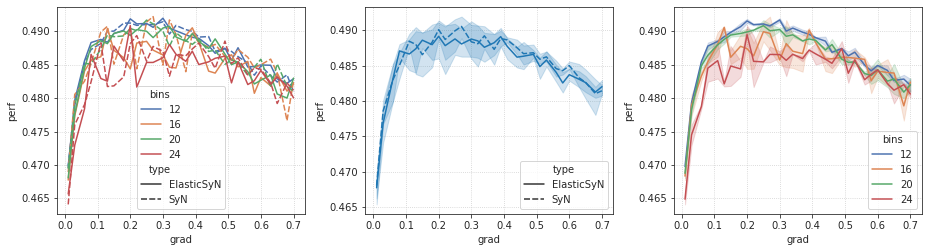

In [18]:
fig, axes = create_figure(1, 3, (13, 3.6))

sns.lineplot(
    data=_df.stack().reset_index(),
    x='grad',
    y='perf',
    hue='bins',
    style='type',
    palette='deep',
    ax=axes[0],
)
sns.lineplot(
    data=_df.stack().reset_index(),
    x='grad',
    y='perf',
    style='type',
    palette='deep',
    ax=axes[1],
)
sns.lineplot(
    data=_df.stack().reset_index(),
    x='grad',
    y='perf',
    hue='bins',
    palette='deep',
    ax=axes[2],
)
for ax in axes.ravel():
    ax.grid()

array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 ])

In [25]:
df_tx, best_tx, perf = reg.fit_register(
    name='',
    mode='3d',
    fixed=reg.in_house,
    moving=reg.nissl,
    save_results=False,
    grads=list(np.linspace(0.1, 0.4, 31)),
    types=['SyN', 'ElasticSyN'],
    bins=[8, 10, 12, 18, 20],
    n_seeds=5,
)

  0%|          | 0/5 [00:00<?, ?it/s]

, perf:
seed           4
grad        0.29
bins          12
type         SyN
perf    0.494299

In [26]:
df = df_tx.groupby(['type', 'bins', 'grad']).mean().drop(columns=['seed'])
df = df.reset_index()

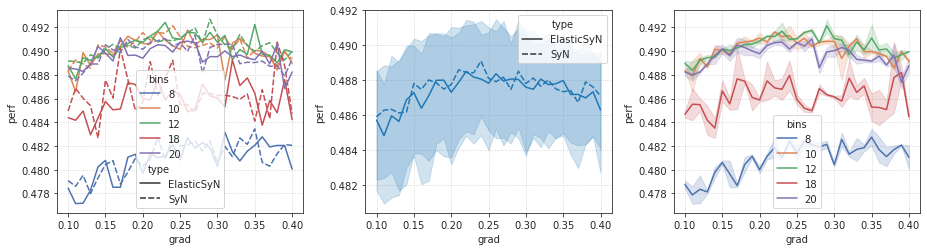

In [31]:
fig, axes = create_figure(1, 3, (13, 3.6))

sns.lineplot(
    data=df,
    x='grad',
    y='perf',
    hue='bins',
    style='type',
    palette='deep',
    ax=axes[0],
)
sns.lineplot(
    data=df,
    x='grad',
    y='perf',
    style='type',
    palette='deep',
    ax=axes[1],
)
sns.lineplot(
    data=df,
    x='grad',
    y='perf',
    hue='bins',
    palette='deep',
    ax=axes[2],
)
for ax in axes.ravel():
    ax.grid()

(0.48, 0.5)

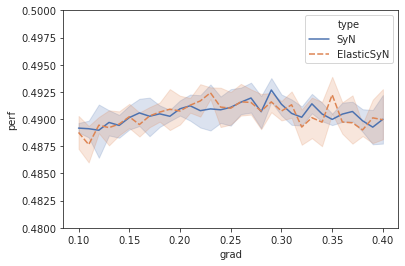

In [35]:
sns.lineplot(
    data=df_tx.loc[df_tx['bins'] ==12],
    x='grad',
    y='perf',
    hue='type',
    style='type',
    palette='deep',
)
plt.ylim(0.48, 0.50)

In [44]:
df_1 = df_tx.loc[(df_tx['bins'] == 12) & (df_tx['type'] == 'SyN')]
df_1.iloc[[df_1['perf'].argmax()]]

,seed,grad,bins,type,perf,tx
1062,8,0.23,12,SyN,0.494826,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [45]:
df_2 = df_tx.loc[(df_tx['bins'] == 12) & (df_tx['type'] == 'ElasticSyN')]
df_2.iloc[[df_2['perf'].argmax()]]

,seed,grad,bins,type,perf,tx
927,4,0.4,12,ElasticSyN,0.495142,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [51]:
tx1 = df_1.iloc[df_1['perf'].argmax()]['tx']
tx2 = df_2.iloc[df_2['perf'].argmax()]['tx']

In [52]:
iso = reset_ants_img(mice.allen['isocortex_mask'])

In [53]:
iso_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=iso,
    transformlist=tx1['fwdtransforms'],
    interpolator='genericLabel',
)
for axis in range(3):
    reg.in_house.plot(
        overlay=iso_yale,
        axis=axis,
        overlay_alpha=0.5,
        overlay_cmap='Reds',
        nslices=49,
        figsize=1,
        filename=f'in_house_SyN_axis{axis}.png',
    )

In [54]:
iso_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=iso,
    transformlist=tx2['fwdtransforms'],
    interpolator='genericLabel',
)
for axis in range(3):
    reg.in_house.plot(
        overlay=iso_yale,
        axis=axis,
        overlay_alpha=0.5,
        overlay_cmap='Reds',
        nslices=49,
        figsize=1,
        filename=f'in_house_ElasticSyN_axis{axis}.png',
    )

In [55]:
dst = 'best_nissl2yale'
for src in tx2['fwdtransforms']:
    ext = '.'.join(src.split('.')[1:])
    _dst = pjoin(
        './', f"{dst}-fwd.{ext}")
    shutil.copyfile(src=src, dst=_dst)
for src in tx2['invtransforms']:
    ext = '.'.join(src.split('.')[1:])
    _dst = pjoin(
        './', f"{dst}-inv.{ext}")
    shutil.copyfile(src=src, dst=_dst)

In [25]:
df_tx, best_tx, perf = reg.fit_register(
    name='',
    mode='3d',
    fixed=reg.in_house,
    moving=reg.nissl,
    save_results=False,
    grads=list(np.round(np.linspace(0.20, 0.35, 16), 5)),
    types=['SyN'],
    bins=[12, 13],
    n_seeds=10,
)

  0%|          | 0/10 [00:00<?, ?it/s]

, perf:
seed          32
grad        0.25
bins          13
type         SyN
perf    0.494667

  0%|          | 0/10 [00:00<?, ?it/s]

, perf:
seed             4
grad          0.31
bins            13
type    ElasticSyN
perf      0.496481

In [26]:
df_3 = df_tx.iloc[[df_tx['perf'].argmax()]]
tx3 = df_3['tx'].item()
df_3

,seed,grad,bins,type,perf,tx
83,4,0.29,13,SyN,0.495242,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


,seed,grad,bins,type,perf,tx
87,4,0.31,13,ElasticSyN,0.496481,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


,seed,grad,bins,type,perf,tx
99,4,0.27,13,ElasticSyN,0.496002,{'warpedmovout': ANTsImage (RAI) Pixel Type ...


In [18]:
df = df_tx.groupby(['type', 'bins', 'grad']).mean().drop(columns=['seed'])
df = df.reset_index()

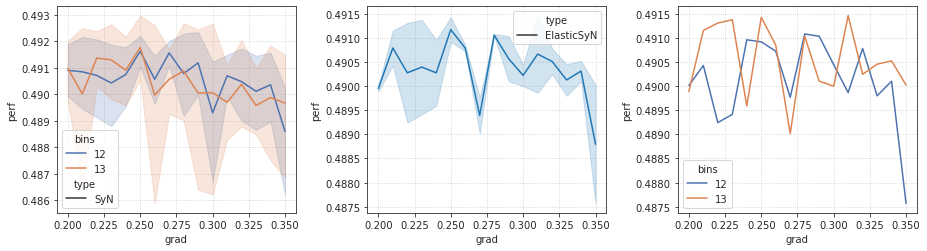

In [27]:
fig, axes = create_figure(1, 3, (13, 3.6))

sns.lineplot(
    data=df_tx,
    x='grad',
    y='perf',
    hue='bins',
    style='type',
    palette='deep',
    ax=axes[0],
)
sns.lineplot(
    data=df,
    x='grad',
    y='perf',
    style='type',
    palette='deep',
    ax=axes[1],
)
sns.lineplot(
    data=df,
    x='grad',
    y='perf',
    hue='bins',
    palette='deep',
    ax=axes[2],
)
for ax in axes.ravel():
    ax.grid()

In [28]:
iso = reset_ants_img(mice.allen['isocortex_mask'])

In [29]:
iso_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=iso,
    transformlist=tx3['fwdtransforms'],
    interpolator='genericLabel',
)
for axis in range(3):
    reg.in_house.plot(
        overlay=iso_yale,
        axis=axis,
        overlay_alpha=0.5,
        overlay_cmap='Reds',
        nslices=49,
        figsize=1,
        filename=f'in_house_SyN_axis{axis}_{now(False)}.png',
    )

In [22]:
dst = 'best_nissl2yale'
for src in tx3['fwdtransforms']:
    ext = '.'.join(src.split('.')[1:])
    _dst = pjoin(
        './', f"{dst}-fwd.{ext}")
    shutil.copyfile(src=src, dst=_dst)
for src in tx3['invtransforms']:
    ext = '.'.join(src.split('.')[1:])
    _dst = pjoin(
        './', f"{dst}-inv.{ext}")
    shutil.copyfile(src=src, dst=_dst)

In [30]:
ants.image_write(reg.in_house, "./inhouse.nii.gz")
ants.image_write(iso_yale, "./iso_yale_SyN.nii.gz")

In [37]:
vis_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=vis,
    transformlist=tx3['fwdtransforms'],
    interpolator='genericLabel',
)

In [38]:
ants.image_write(vis_yale, "./vis_yaleSyN.nii.gz")

In [203]:
reg = Register(mice, resolution=100)

In [204]:
iso = reset_ants_img(mice.allen['isocortex_mask'])

vis = mice.allen['structure_tree'].get_structures_by_acronym(['VIS'])[0]
vis = mice.allen['mcc'].get_structure_mask(vis['id'])[0]
vis = reset_ants_img(vis)

mask_r = reset_ants_img(mice.parcel.results['mask_r'], dtype='uint32')
mask_l = reset_ants_img(mice.parcel.results['mask_l'], dtype='uint32')

In [213]:
tx = ants.registration(
    fixed=reg.in_house,
    moving=reg.nissl,
    mask=reg.nissl.get_mask(),
    type_of_transform='ElasticSyN',
    syn_metric='mattes',
    grad_step=0.15,
    syn_sampling=20,
    aff_sampling=20,
    random_seed=4,
)

In [214]:
iso_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=iso,
    transformlist=tx['fwdtransforms'],
    interpolator='genericLabel',
)
vis_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=vis,
    transformlist=tx['fwdtransforms'],
    interpolator='genericLabel',
)
mask_r_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=mask_r,
    transformlist=tx['fwdtransforms'],
    interpolator='genericLabel',
)
mask_l_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=mask_l,
    transformlist=tx['fwdtransforms'],
    interpolator='genericLabel',
)

0.4983675083710535

In [1]:
warped = ants.apply_transforms(
    fixed=reg.in_house,
    moving=reg.nissl,
    transformlist=tx['fwdtransforms'],
    interpolator='linear',
)
mi = ants.image_mutual_information(
    reg.in_house, warped)
mi_base = ants.image_mutual_information(
    reg.in_house, reg.in_house)
perf = mi / mi_base

score_iso = symmetry_score(
    m=iso_yale.numpy().astype(bool),
    mask_l=mask_l_yale.numpy().astype(bool),
    mask_r=mask_r_yale.numpy().astype(bool),
)
score_vis = symmetry_score(
    m=vis_yale.numpy().astype(bool),
    mask_l=mask_l_yale.numpy().astype(bool),
    mask_r=mask_r_yale.numpy().astype(bool),
)
print(f"mi: {perf:.4f},\t\tiso: {score_iso:.4f},\tvis: {score_vis:.4f}")

NameError: name 'symmetry_score' is not defined

In [217]:
ants.image_write(iso_yale, "./iso_yale_ElasticSyN_0.1_Best.nii.gz")
ants.image_write(vis_yale, "./vis_yale_ElasticSyN_0.1_Best.nii.gz")

In [158]:
ants.image_write(iso_yale, "./iso_yale_SyN_best.nii.gz")
ants.image_write(vis_yale, "./vis_yale_SyN_best.nii.gz")

In [218]:
ants.image_write(reg.in_house, './in_house_0.1.nii.gz')

## do the double thing

In [16]:
mice = Mice(Config(32), load_preproc=True)

key = 'sub-SLC04_ses-2'
indiv = mice.T1w[key].get_data()
indiv = reg._prepare(indiv)

In [20]:
_df_tx, _best_tx, _perf = reg.fit_register(
    name='a',
    mode='3d',
    fixed=reg.in_house,
    moving=indiv,
    save_results=False,
    grads=[np.round(e, 2) for e in np.linspace(0.1, 0.4, 7)],
    types=['SyN', 'ElasticSyN'],
    bins=[16, 20, 24],
    n_seeds=5,
)

0it [00:00, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

  0%|          | 0/7 [00:00<?, ?it/s]

a, perf:
seed          16
grad         0.2
bins          20
type         SyN
perf    0.725569

In [21]:
iso_yale_indiv = ants.apply_transforms(
    fixed=indiv,
    moving=iso_yale,
    transformlist=_best_tx['invtransforms'],
    interpolator='genericLabel',
)

In [27]:
indiv.plot(
    overlay=iso_yale_indiv,
    axis=2,
    overlay_alpha=0.6,
    overlay_cmap='Reds',
    nslices=49,
    figsize=1,
    filename='in_house_indiv.png',
)

In [25]:
warped = ants.apply_transforms(
    fixed=reg.in_house,
    moving=reg.nissl,
    transformlist=best_tx['fwdtransforms'],
    interpolator='linear',
)
warped = ants.apply_transforms(
    fixed=indiv,
    moving=warped,
    transformlist=_best_tx['invtransforms'],
    interpolator='linear',
)
mi = ants.image_mutual_information(
    indiv, warped)
mi_base = ants.image_mutual_information(
    indiv, indiv)
mi / mi_base

0.5645622211082675

In [49]:
df_tx, best_tx, perf = reg.fit_register(
    name='a',
    mode='3d',
    fixed=reg.in_house,
    moving=reg.nissl,
    save_results=False,
    grads=[np.round(e, 2) for e in np.linspace(0.1, 0.5, 9)],
    types=['SyN'],
    bins=[16, 24, 32],
    n_seeds=5,
)

0it [00:00, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

  0%|          | 0/30 [00:00<?, ?it/s]

a, perf:
seed             4
grad          0.23
bins            16
type    ElasticSyN
perf      0.494515

perf 
 
 
 
 grad 
 0.01 
 0.02 
 0.03 
 0.04 
 0.05 
 0.06 
 0.07 
 0.08 
 0.09 
 0.10 
 ... 
 0.21 
 0.22 
 0.23 
 0.24 
 0.25 
 0.26 
 0.27 
 0.28 
 0.29 
 0.30 
 
 
 type 
 bins 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 ElasticSyN 
 8 
 0.453141 
 0.461229 
 0.465174 
 0.469853 
 0.471667 
 0.473793 
 0.474874 
 0.475311 
 0.476497 
 0.476920 
 ... 
 0.480840 
 0.480008 
 0.481281 
 0.480924 
 0.481478 
 0.482291 
 0.482579 
 0.481916 
 0.481200 
 0.482354 
 
 
 16 
 0.462941 
 0.475786 
 0.478183 
 0.477347 
 0.479309 
 0.481964 
 0.487736 
 0.482744 
 0.488263 
 0.489846 
 ... 
 0.485163 
 0.490731 
 0.492102 
 0.486296 
 0.489641 
 0.492101 
 0.488388 
 0.486191 
 0.489383 
 0.491347 
 
 
 32 
 0.461339 
 0.470227 
 0.472704 
 0.476905 
 0.479029 
 0.481106 
 0.481921 
 0.483379 
 0.482918 
 0.483812 
 ... 
 0.486910 
 0.484310 
 0.486321 
 0.485143 
 0.484668 
 0.486916 
 0.486084 
 0.486187 
 0.485689 
 0.484811 
 
 
 
 3 rows × 30 columns

,type,bins,grad,perf
0,ElasticSyN,8,0.01,0.453141
1,ElasticSyN,8,0.02,0.461229
2,ElasticSyN,8,0.03,0.465174
3,ElasticSyN,8,0.04,0.469853
4,ElasticSyN,8,0.05,0.471667
...,...,...,...,...
85,ElasticSyN,32,0.26,0.486916
86,ElasticSyN,32,0.27,0.486084
87,ElasticSyN,32,0.28,0.486187
88,ElasticSyN,32,0.29,0.485689


<AxesSubplot:xlabel='grad', ylabel='perf'>

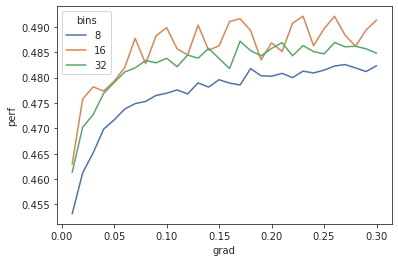

In [74]:
nissl_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=reg.nissl,
    transformlist=best_tx['fwdtransforms'],
    interpolator='gaussian',
)
mi = ants.image_mutual_information(
    reg.in_house, nissl_yale)
mi_base = ants.image_mutual_information(
    reg.in_house, reg.in_house)
mi / mi_base

0.5149954810621087

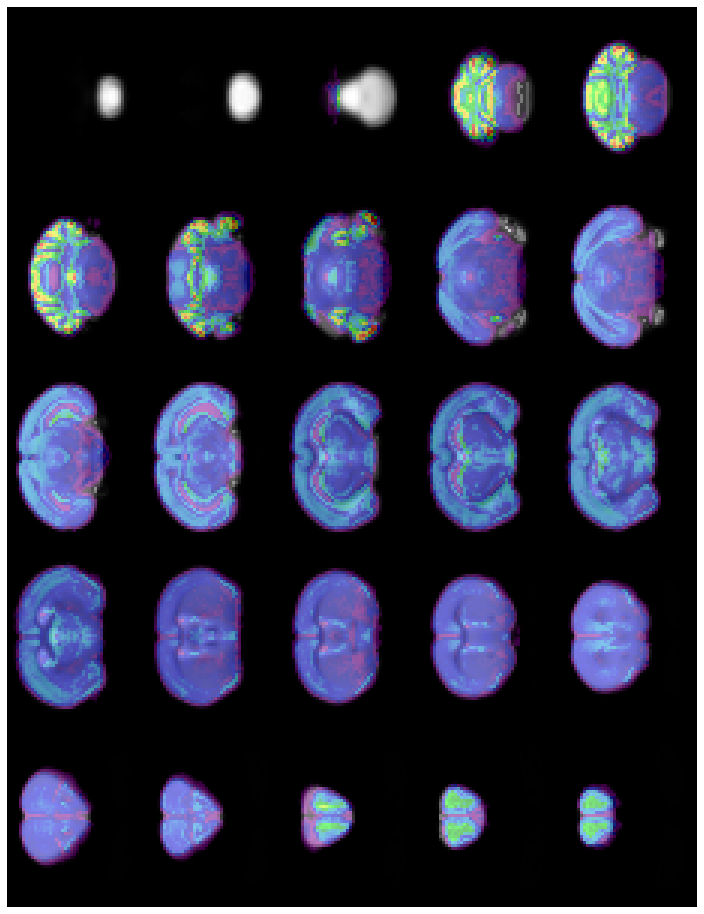

In [75]:
reg.in_house.plot(
    overlay=nissl_yale,
    axis=0,
    overlay_alpha=0.5,
    overlay_cmap='nipy_spectral',
    nslices=25,
    figsize=2.5,
)

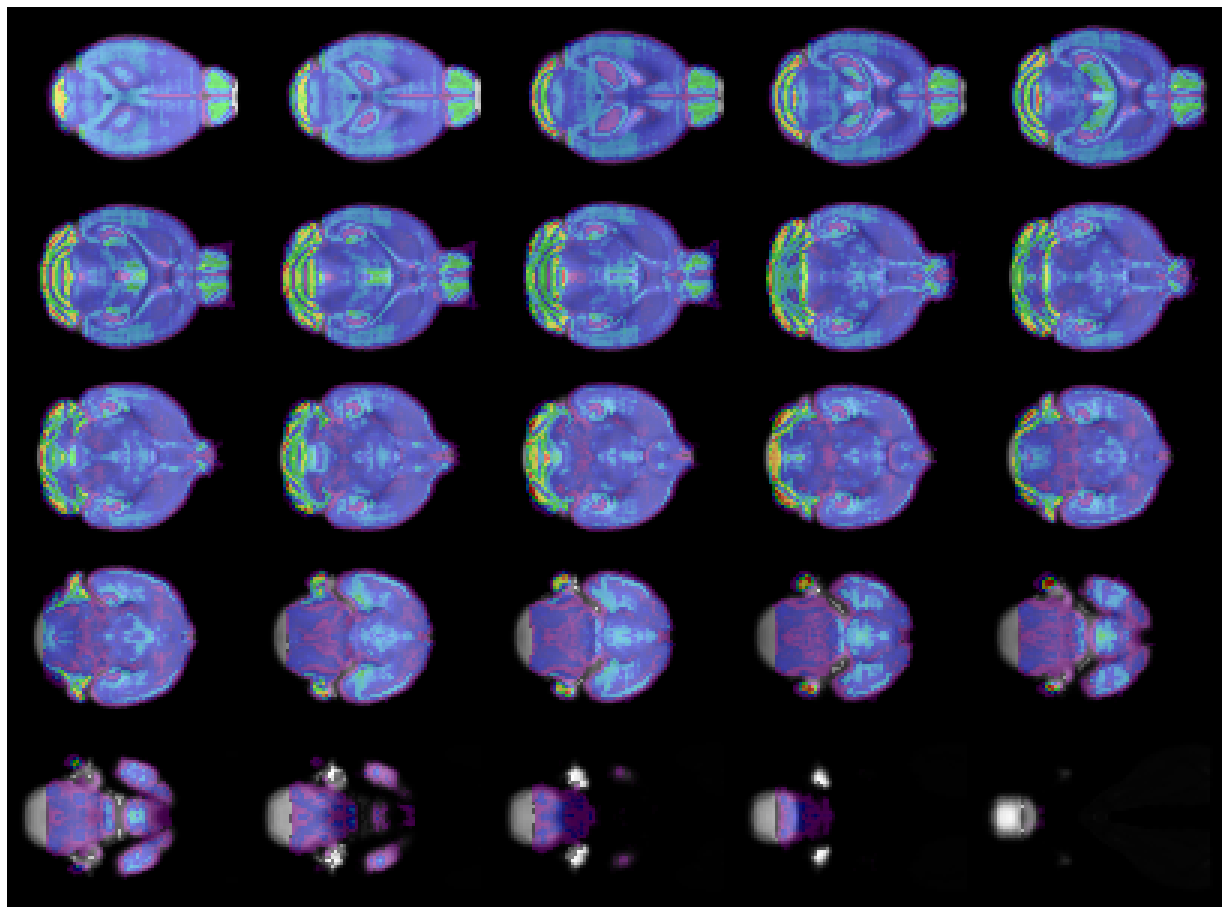

In [76]:
reg.in_house.plot(
    overlay=nissl_yale,
    axis=1,
    overlay_alpha=0.5,
    overlay_cmap='nipy_spectral',
    nslices=25,
    figsize=2.5,
)

In [77]:
iso = reset_ants_img(mice.allen['isocortex_mask'])

iso_yale = ants.apply_transforms(
    fixed=reg.in_house,
    moving=iso,
    transformlist=best_tx['fwdtransforms'],
    interpolator='genericLabel',
)

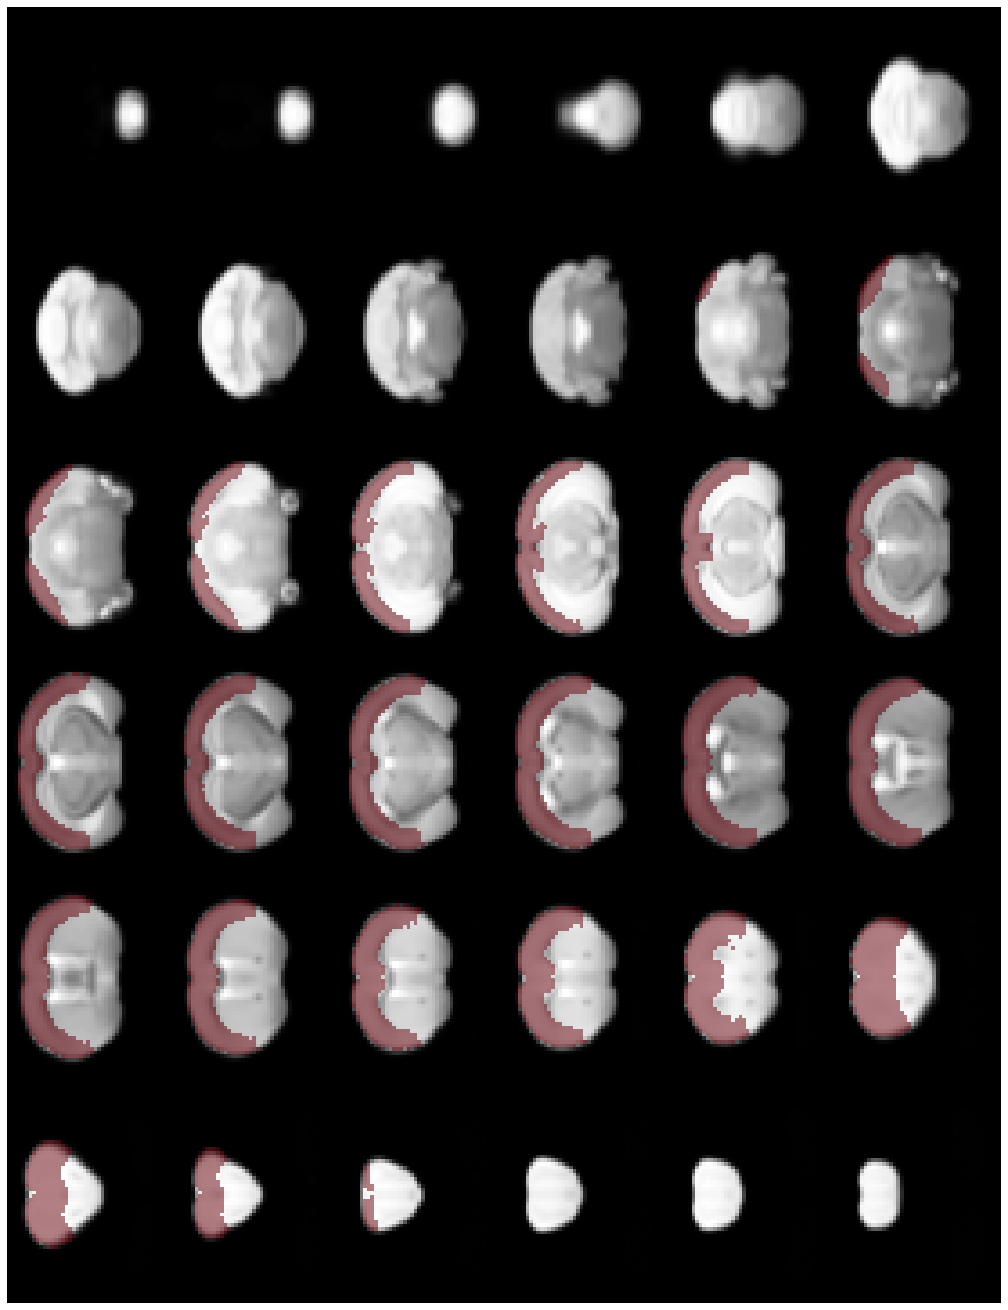

In [78]:
reg.in_house.plot(
    overlay=iso_yale,
    axis=0,
    overlay_alpha=0.5,
    overlay_cmap='Reds',
    nslices=36,
    figsize=3,
)

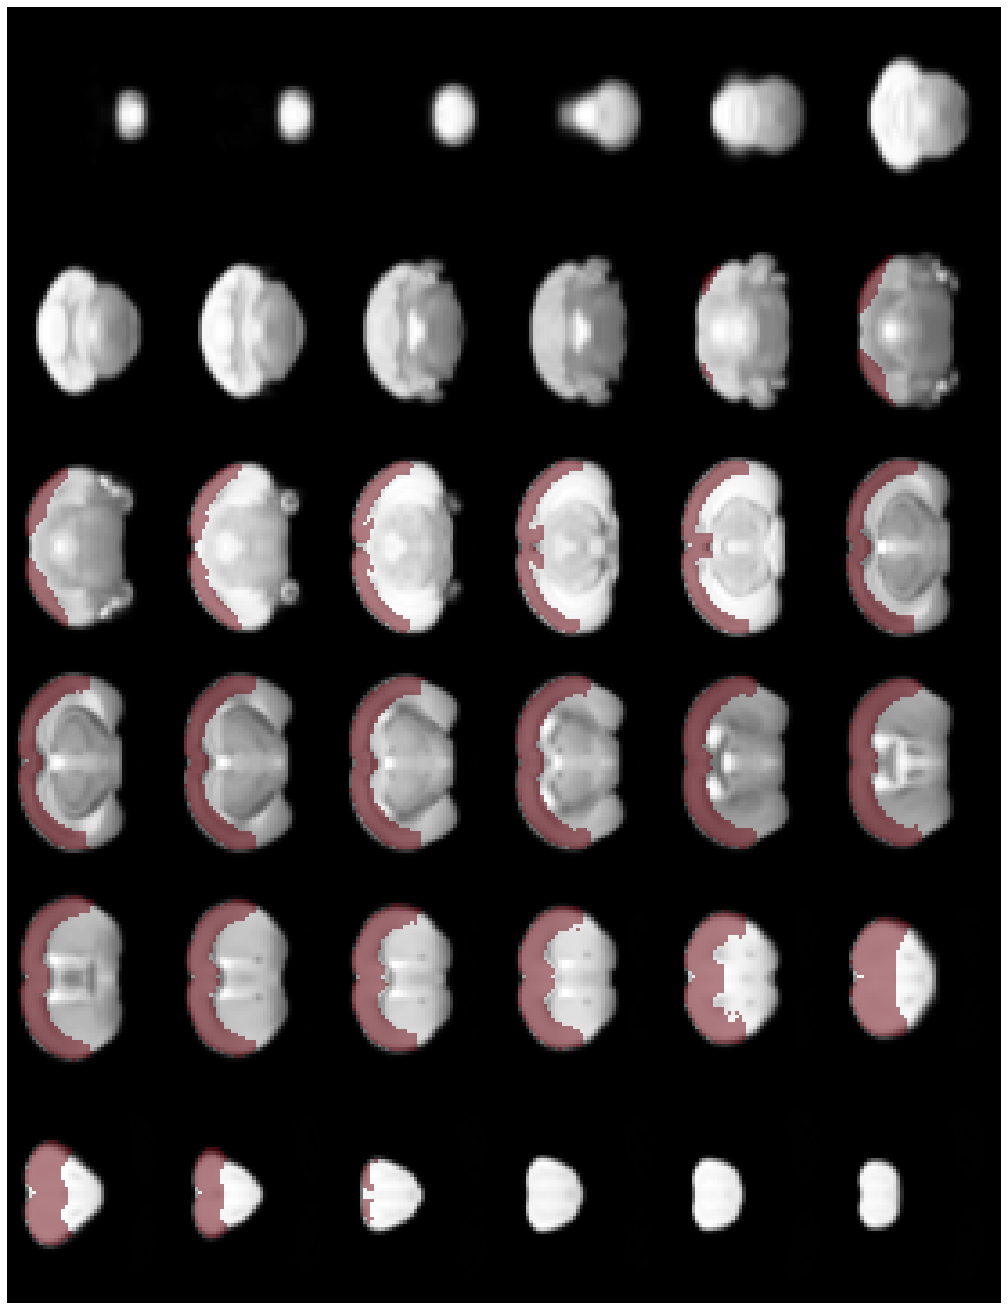

## Next, load slides and watch out for bad registrations

## Next, do the same for each individual animal, check if it works

## Next, see if you need to register per animal, or just register individuals to N162 and gateway?

## Figure 1

### What

### How

In [2]:
mice = Mice(Config(1884))
mice.combine_dfs(full=True)

In [3]:
mice.parcel

<register.parcellation.Parcellation object at 0x7fd556815fd0>

In [ ]:
cortex = self.mice.parcel.results['eroded']
subcortex = np.zeros_like(cortex)
for region, m in self.mice.parcel.results['roi_masks'].items():
    if str(self.mice.allen['isocortex']['id']) in region:
        continue
    region_i = int(region.split('-')[-1])
    subcortex[m] = region_i

In [4]:
mice.allen['template_info']

OrderedDict([('type', 'unsigned short'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([132,  80, 114])), ('space directions', array([[100.,   0.,   0.],
       [  0., 100.,   0.],
       [  0.,   0., 100.]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([0., 0., 0.]))])

In [6]:
mice.allen['mcc'].resolution

100

In [7]:
mice.allen['template_info']['space origin']

array([0., 0., 0.])

In [9]:
list(mice.parcel.results2d)

[
    'atlas_trm',
    'contour_trm',
    'parcel_trm',
    'eroded_trm',
    'parcel_acc_trm',
    'parcel_rej_trm',
    'mask_l_trm',
    'mask_r_trm',
    'atlas',
    'contour',
    'parcel',
    'eroded',
    'parcel_acc',
    'parcel_rej',
    'mask_l',
    'mask_r',
    'radius',
    'n_cortical_regions',
    'centers',
    'eroded_masks',
    'roi_masks',
    'major_masks',
    'major_colors',
    'annot_cmap',
    'acro2idx',
    'name2idx'
]

<matplotlib.image.AxesImage object at 0x7fd54eaf5a00>

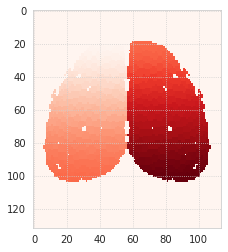

In [16]:
plt.imshow(mice.parcel.results2d['parcel_acc'], cmap='Reds')

In [17]:
mice.parcel.results2d['parcel_acc'].shape

(132, 114)

In [19]:
.shape

(132, 1, 114)

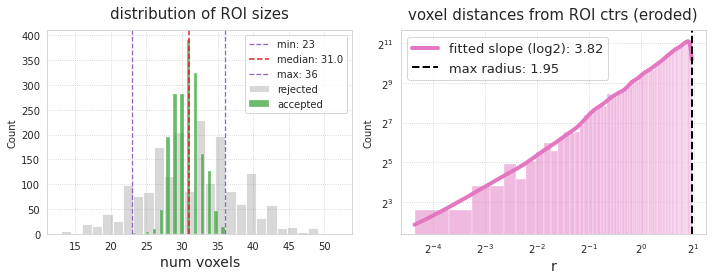

In [77]:
_ = mice.parcel.show()

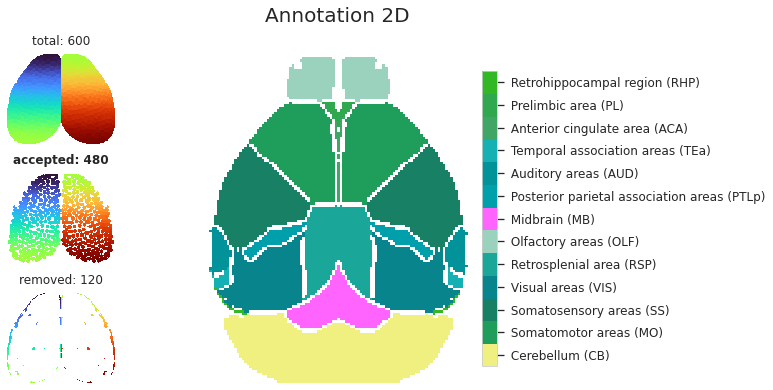

In [78]:
_ = mice.parcel.show2d()

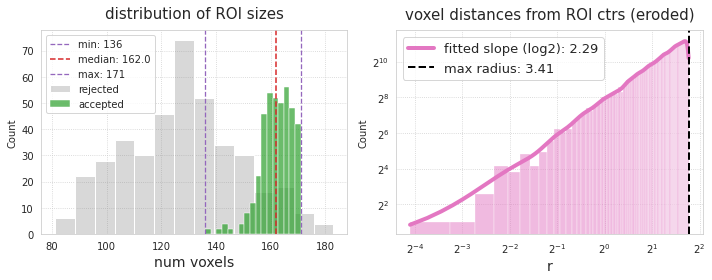

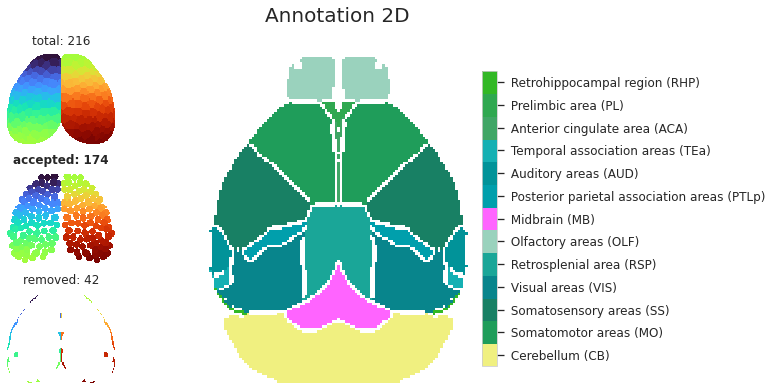

In [53]:
net = Network(mice, 'sub-SLC', percentiles=np.linspace(29, 10, 21)).load_network()

In [54]:
net.thresholds

{
    53: 0.0,
    29: 0.04139814153035346,
    28: 0.0439684986595741,
    27: 0.04665225133476631,
    26: 0.04936660219451171,
    25: 0.052399799401693696,
    24: 0.05545280871768082,
    23: 0.0586778935809938,
    22: 0.06223419581750657,
    21: 0.06604398443860941,
    20: 0.07007351599928377,
    19: 0.07444967885731966,
    18: 0.07908949206469937,
    17: 0.08432095527569944,
    16: 0.08963561001531985,
    15: 0.09574749438834834,
    14: 0.10194368215506612,
    13: 0.10915048865093123,
    12: 0.11692139398431177,
    11: 0.12552904940431253,
    10: 0.13497348491291086
}

In [56]:
a = nx.adj_matrix(net.graphs[20]).todense()

In [57]:
np.min(a[a > 0])

0.08037398611890612

In [58]:
nx.density(net.graphs[20])

0.17830474509149033

In [59]:
net.make_graphs(False)

[PROGRESS] graphs: done

In [60]:
nx.density(net.graphs[20])

0.20080158408283036

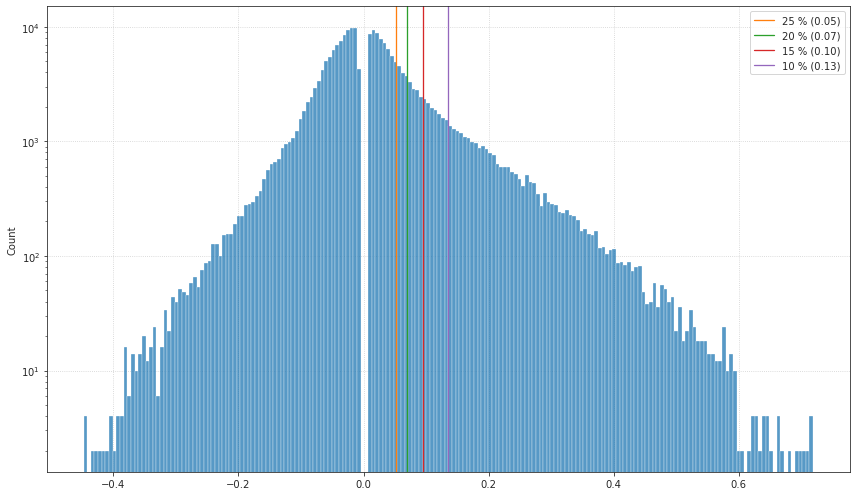

In [73]:
fig, ax = create_figure(1, 1, (12, 7))

x = net.adj.copy()
sns.histplot(x[x != 0], bins=200, ax=ax)
plt.yscale('log')

for i, d in enumerate([25, 20, 15, 10], start=1):
    th = net.thresholds[d]
    ax.axvline(th, lw=1.3, color=f"C{i}", label=f"{d} % ({th:.2f})")
ax.legend()
ax.grid()

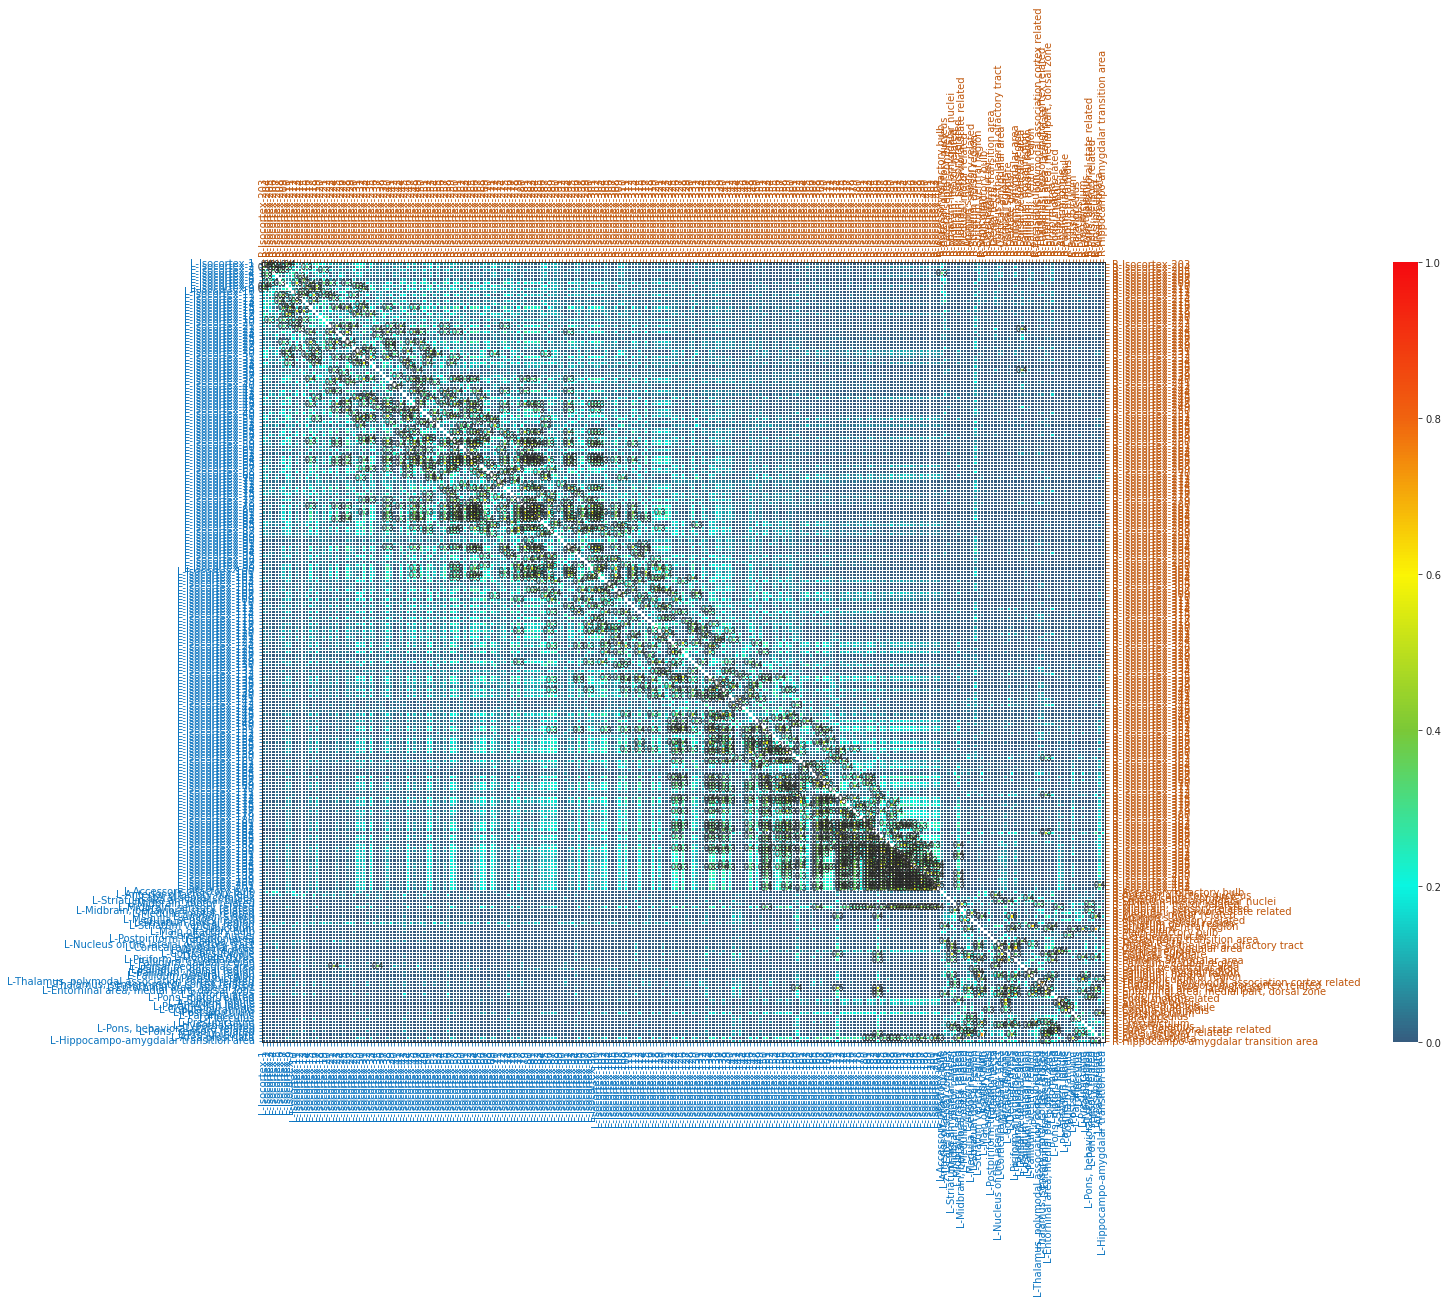

In [74]:
_ = net.fig_within_hemis()

In [84]:
x = mice.allen['mcc'].get_template_volume()[0]

<matplotlib.image.AxesImage object at 0x7fb7fb5608b0>

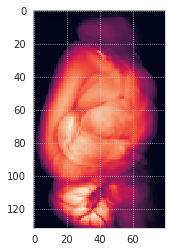

In [87]:
plt.imshow(x.mean(2))

In [92]:
ref = mice.allen['mcc'].get_reference_space()

<matplotlib.image.AxesImage object at 0x7fb7faf59ee0>

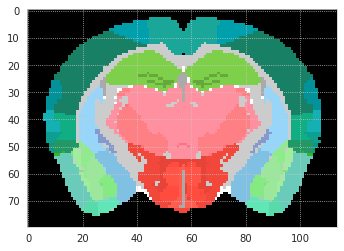

In [99]:
plt.imshow(ref.get_slice_image(0, 7000))

In [100]:
mice.allen['mcc'].

TypeError: get_projection_matrix() missing 1 required positional argument: 'experiment_ids'

In [101]:
from bg_atlasapi import show_atlases, BrainGlobeAtlas

In [102]:
show_atlases()

                                                                                  
                                                                                  
                                Brainglobe Atlases                                
╭──────────────────────────────────┬────────────┬───────────────┬────────────────╮
│ Name                             │ Downloaded │ Local version │ Latest version │
├──────────────────────────────────┼────────────┼───────────────┼────────────────┤
│ allen_cord_20um                  │     ✔      │      1.0      │      1.0       │
│ mpin_zfish_1um                   │     ✔      │      1.0      │      1.0       │
│ example_mouse_100um              │     ✔      │      1.2      │      1.2       │
│ kim_mouse_100um                  │     ✔      │      1.0      │      1.0       │
│ osten_mouse_100um                │     ✔      │      1.1      │      1.1       │
│ allen_mouse_100um                │     ✔      │      1.2      │      1.2       │
│ allen_mouse_10um                 │    ---     │      ---      │      1.2       │
│ allen_mouse_25um                 │    ---     │      ---      │      1.2       │
│ allen_mouse_50um                 │    ---     │      ---      │      1.2       │
│ allen_human_500um                │    ---     │      ---      │      0.1       │
│ kim_mouse_10um                   │    ---     │      ---      │      1.0       │
│ kim_mouse_25um                   │    ---     │      ---      │      1.0       │
│ kim_mouse_50um                   │    ---     │      ---      │      1.0       │
│ osten_mouse_10um                 │    ---     │      ---      │      1.1       │
│ osten_mouse_25um                 │    ---     │      ---      │      1.1       │
│ osten_mouse_50um                 │    ---     │      ---      │      1.1       │
╰──────────────────────────────────┴────────────┴───────────────┴────────────────╯

In [111]:
atlas = BrainGlobeAtlas('kim_mouse_100um')

kim mouse atlas (res. 100um)
From: https://kimlab.io/brain-map/atlas/ (Chon et al. 2019, https://doi.org/10.1038/s41467-019-13057-w )


<matplotlib.image.AxesImage object at 0x7fb7fa64bc40>

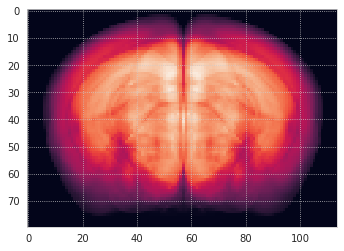

In [114]:
plt.imshow(atlas.reference.mean(0))

In [116]:
list(mice.allen)

[
    'mcc',
    'manifest_file',
    'structure_tree',
    'dims_flat',
    'root',
    'grey',
    'cerebrum',
    'isocortex',
    'template',
    'template_info',
    'annot',
    'annot_info',
    'root_mask',
    'root_mask_info',
    'grey_mask',
    'grey_mask_info',
    'cerebrum_mask',
    'cerebrum_mask_info',
    'isocortex_mask',
    'isocortex_mask_info',
    'onto_info_df',
    'mc_summary_df',
    'expts_df'
]

In [119]:
from allensdk.api.queries.reference_space_api import ReferenceSpaceApi

In [127]:
ref = ReferenceSpaceApi()

In [129]:
ref.build_volumetric_data_download_url('ara_nissl', file_name='ara_nissl_100.nrrd', voxel_resolution=100)

'http://download.alleninstitute.org/informatics-archive/current-release/mouse_ccf/ara_nissl/ara_nissl_100.nrrd'

In [131]:
[e for e in os.listdir(tmp_dir) if 'nrrd' in e]

['ara_nissl_100.nrrd']

In [135]:
import nrrd
ara, header = nrrd.read(pjoin(tmp_dir, 'ara_nissl_100.nrrd'))
print(ara.shape)
print(header)

(132, 80, 114)

OrderedDict([('type', 'float'), ('dimension', 3), ('space', 'left-posterior-superior'), 
('sizes', array([132,  80, 114])), ('space directions', array([[100.,   0.,   0.],
       [  0., 100.,   0.],
       [  0.,   0., 100.]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 
'little'), ('encoding', 'gzip'), ('space origin', array([0., 0., 0.]))])

<matplotlib.image.AxesImage object at 0x7fb842cd3490>

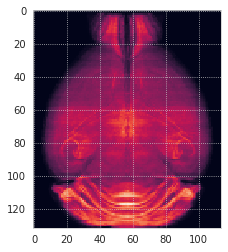

In [160]:
plt.imshow(ara.mean(1))

<matplotlib.colorbar.Colorbar object at 0x7fb7fc3dce50>

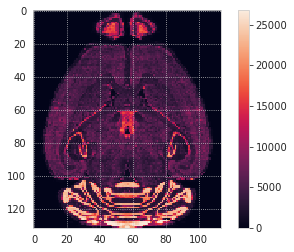

In [168]:
plt.imshow(ara[:, 30, :])
plt.colorbar()